In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv("dragon_real_estate.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# Check for the 'CHAS' feature distribution
count_CHAS = df.value_counts("CHAS")
print(count_CHAS)

CHAS
0    471
1     35
Name: count, dtype: int64


In [5]:
# Descriptive statistics
print(df.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

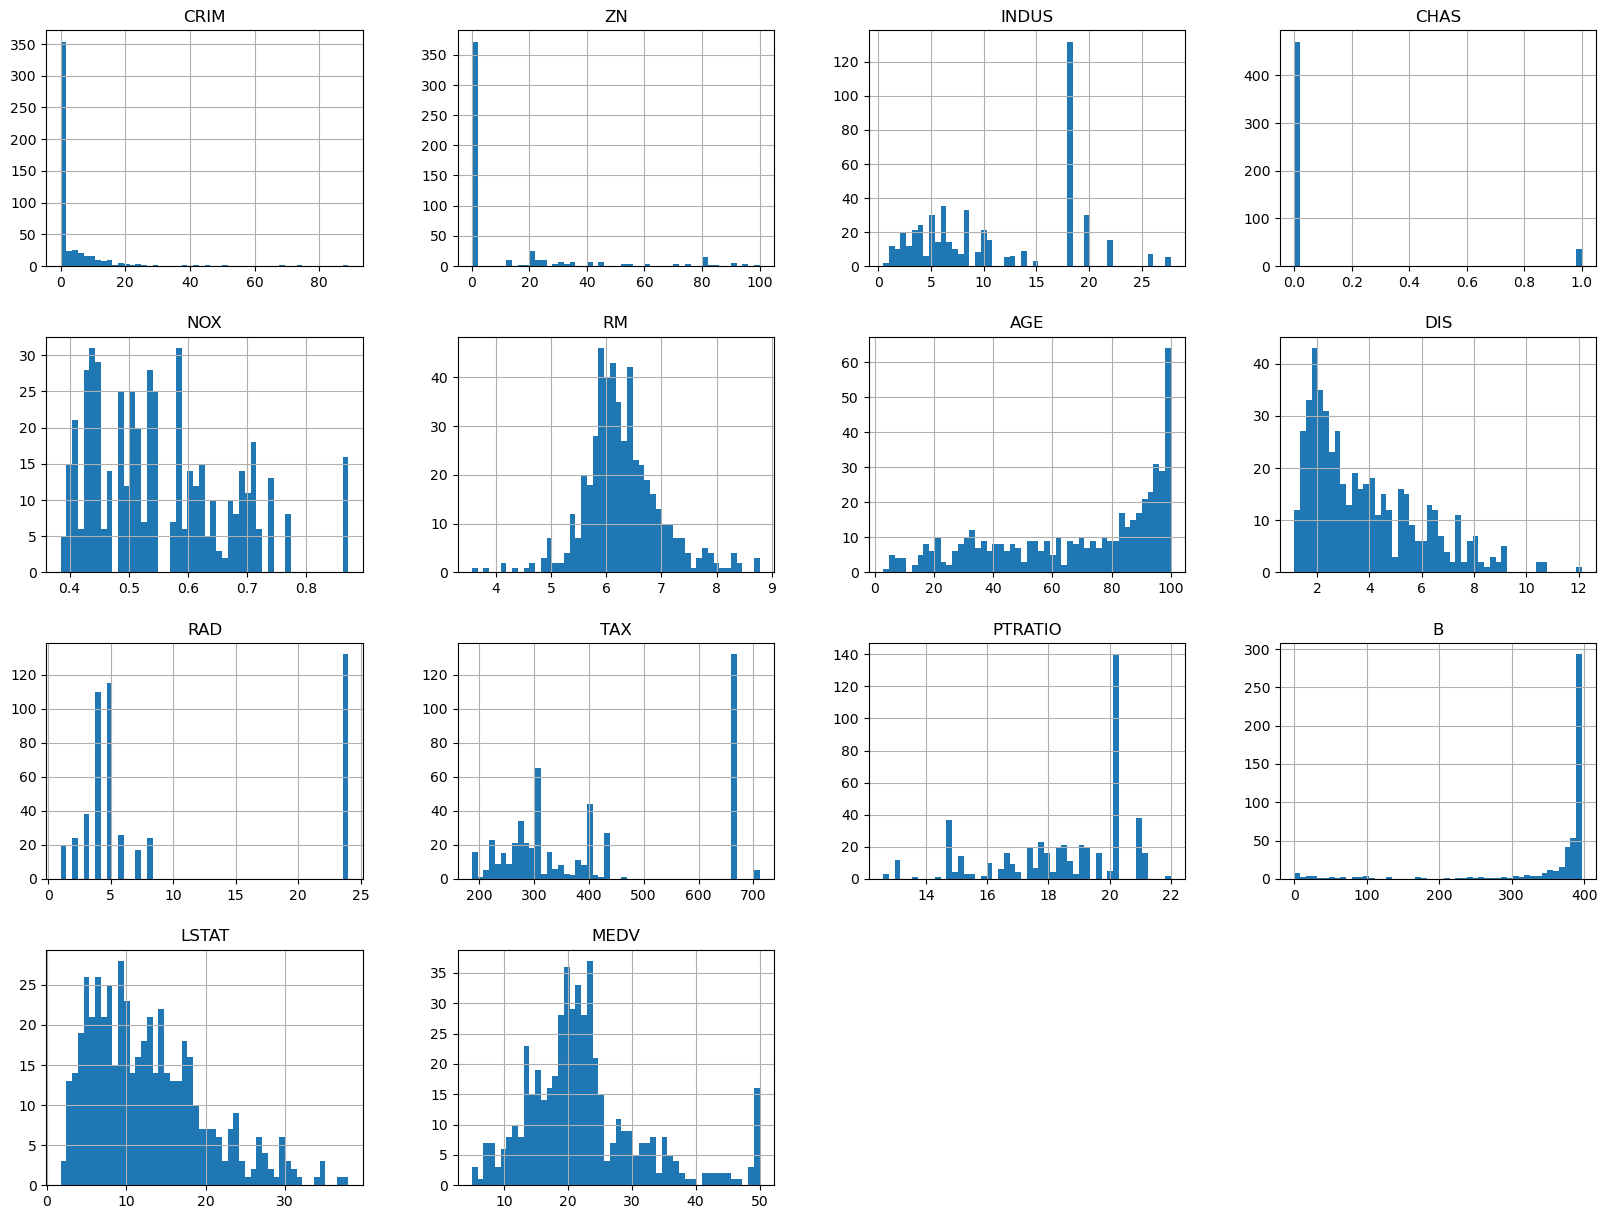

In [6]:
# Histogram of all the features
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
"""# **TRAIN_TEST_SPLIT**"""

# Split the data into training and test sets using stratified sampling on the 'CHAS' feature
def stratified_split(df, target_column, test_size=0.2, random_state=42):
    strat_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_index, test_index in strat_split.split(df, df[target_column]):
        train_set = df.iloc[train_index]
        test_set = df.iloc[test_index]
    return train_set, test_set

train_set, test_set = stratified_split(df, target_column='CHAS', test_size=0.2, random_state=42)


In [8]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [9]:
print('Number of data in training set:', len(train_set))
print('Number of data in test set:', len(test_set))

Number of data in training set: 404
Number of data in test set: 102


In [10]:
# Display the 'CHAS' column from both sets
print("Training set - CHAS column:")
print(train_set['CHAS'])

print("\nTest set - CHAS column:")
print(test_set['CHAS'])

Training set - CHAS column:
254    0
348    0
476    0
321    0
326    0
      ..
155    1
423    0
98     0
455    0
216    1
Name: CHAS, Length: 404, dtype: int64

Test set - CHAS column:
342    0
379    0
223    0
219    1
48     0
      ..
88     0
466    0
52     0
121    0
218    1
Name: CHAS, Length: 102, dtype: int64


In [11]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


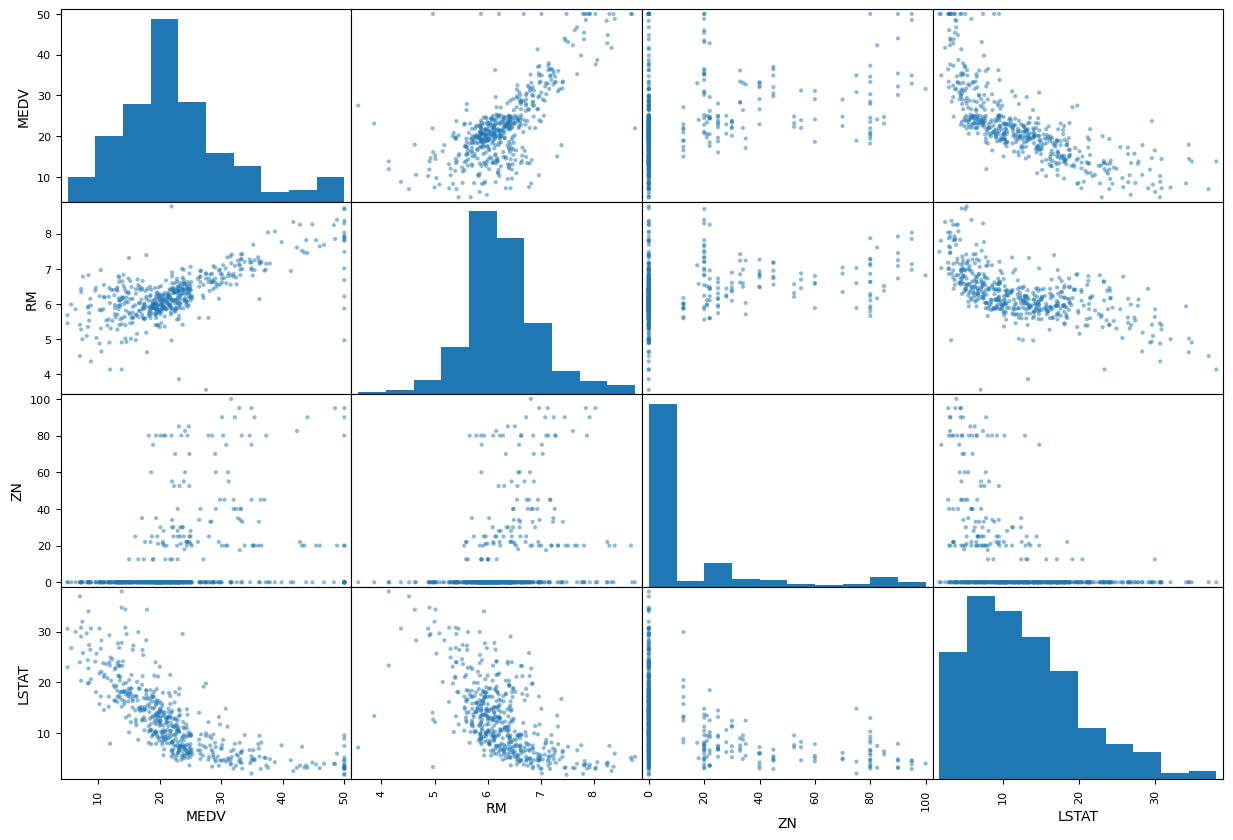

In [12]:
# Scatter plot matrix for selected attributes
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(df[attributes], figsize=(15, 10))
plt.show()

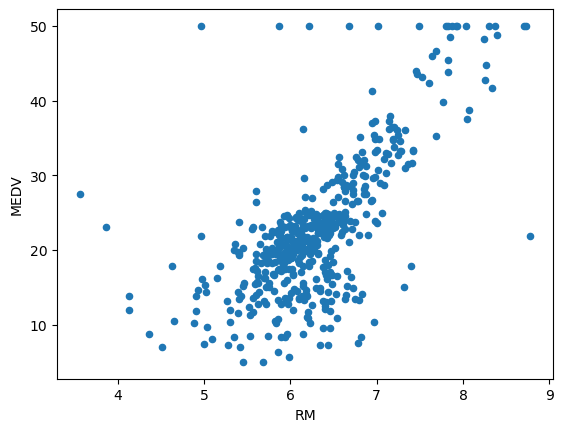

In [13]:
# Scatter plot of 'RM' vs 'MEDV'
df.plot(kind="scatter", x="RM", y="MEDV")
plt.show()


In [14]:
"""# Creating Pipelines using sklearn"""

# Prepare the data (excluding the target variable 'MEDV' before fitting the pipeline)
x = df.drop("MEDV", axis=1)
y = df["MEDV"].copy()

# Create a pipeline to handle missing values and feature scaling
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler()),
])

# Fit the pipeline to the training features
x_prepared = my_pipeline.fit_transform(x)

In [15]:
"""# Model Running"""

# Linear Regression model
model_linear = LinearRegression()
model_linear.fit(x_prepared, y)

# Decision Tree model
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(x_prepared, y)

# Random Forest model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(x_prepared, y)

RandomForestRegressor(random_state=42)

In [16]:
"""# **Evaluating Model**"""

# Evaluate Decision Tree model using RMSE
df_pred_tree = model_tree.predict(x_prepared)
mse_tree = mean_squared_error(y, df_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print("Decision Tree RMSE:", rmse_tree)

# Evaluate Linear Regression model using RMSE
df_pred_linear = model_linear.predict(x_prepared)
mse_linear = mean_squared_error(y, df_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("Linear Regression RMSE:", rmse_linear)

# Evaluate Random Forest model using RMSE
df_pred_rf = model_rf.predict(x_prepared)
mse_rf = mean_squared_error(y, df_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest RMSE:", rmse_rf)

Decision Tree RMSE: 0.0
Linear Regression RMSE: 4.684151441056087
Random Forest RMSE: 1.2085088057589137


In [17]:
"""# Cross Validation score for models"""

# Cross-validation for Decision Tree
scores_tree = cross_val_score(model_tree, x_prepared, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores_tree = np.sqrt(-scores_tree)
print("Decision Tree Cross-Validation RMSE:", rmse_scores_tree)

# Cross-validation for Linear Regression
scores_linear = cross_val_score(model_linear, x_prepared, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores_linear = np.sqrt(-scores_linear)
print("Linear Regression Cross-Validation RMSE:", rmse_scores_linear)

# Cross-validation for Random Forest
scores_rf = cross_val_score(model_rf, x_prepared, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores_rf = np.sqrt(-scores_rf)
print("Random Forest Cross-Validation RMSE:", rmse_scores_rf)

Decision Tree Cross-Validation RMSE: [4.10224711 3.1660887  4.05332108 7.52297136 3.99624824 6.67407921
 3.04279477 9.49771551 7.55277432 4.04858   ]
Linear Regression Cross-Validation RMSE: [ 3.06416301  3.80125803  3.7521992   5.94248753  5.65601713  4.46518092
  3.14148523 12.99357193  5.76880834  3.31553668]
Random Forest Cross-Validation RMSE: [3.24716165 2.27513553 2.1985007  4.67544082 3.36696573 4.80294138
 2.68819609 9.63923539 5.27188402 3.65849126]


In [19]:
"""# **Testing the model on test data**"""

# Prepare the test set
x_test = test_set.drop("MEDV", axis=1)  # Drop 'MEDV' from the test set
y_test = test_set["MEDV"].copy()

# Transform the test set using the same pipeline
x_test_prepared = my_pipeline.transform(x_test)

# Predict and evaluate the model on the test set
final_predictions = model_rf.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE on test set:", final_rmse)


Final RMSE on test set: 1.1419674113684024
